In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\spand\Downloads\Salary_dataset.csv")

In [6]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [14]:
# Drop the first column by index
df = df.drop(df.columns[0], axis=1)

In [16]:
df.info()  #to understand the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [18]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [20]:
df.isnull().sum()   #to check the missing values

YearsExperience    0
Salary             0
dtype: int64

In [22]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


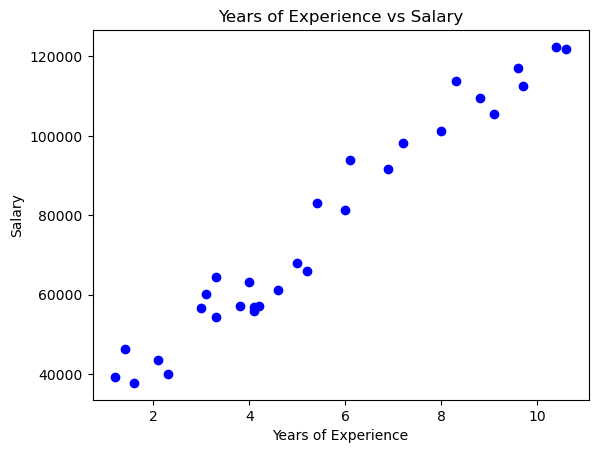

In [51]:
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

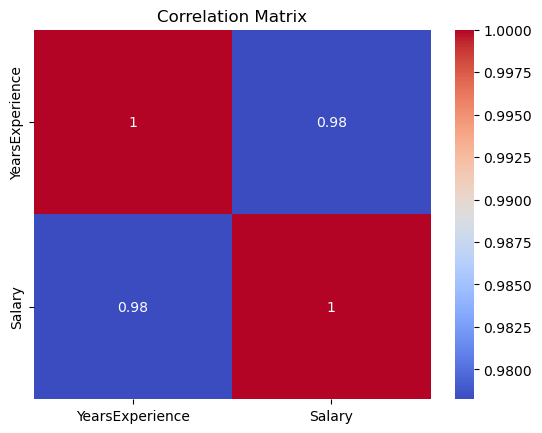

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [32]:
#prepare data
X = df[['YearsExperience']]  # Independent variable
y = df['Salary']  # Dependent variable

In [34]:
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [36]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [38]:
#split the data for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#train the model
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()  #This instance will be trained on the data to find the best-fit line.

In [44]:
#To learn the relationship between YearsExperience and Salary
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

In [66]:
y_pred

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

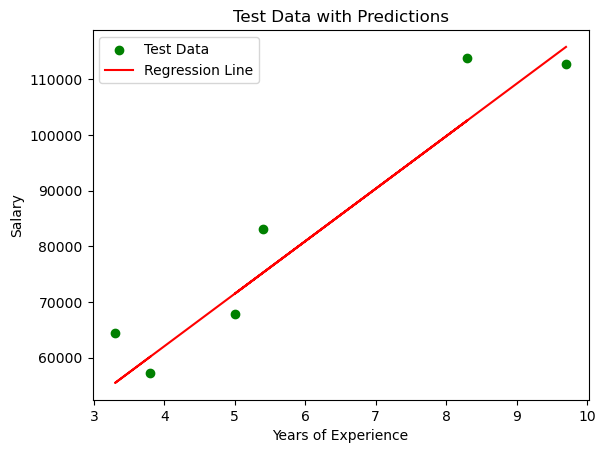

In [56]:
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Test Data with Predictions')
plt.legend()
plt.show()

In [58]:
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Slope (m): 9423.81532303098
Intercept (c): 24380.20147947369


In [62]:
# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results.head())  # Display the first few rows

     Actual      Predicted
0  112636.0  115791.210113
1   67939.0   71499.278095
2  113813.0  102597.868661
3   83089.0   75268.804224
4   64446.0   55478.792045


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [72]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error (MAE): 6286.453830757745
Mean Squared Error (MSE): 49830096.855908334
Root Mean Squared Error (RMSE): 7059.043621901506
R2 Score: 0.9024461774180498


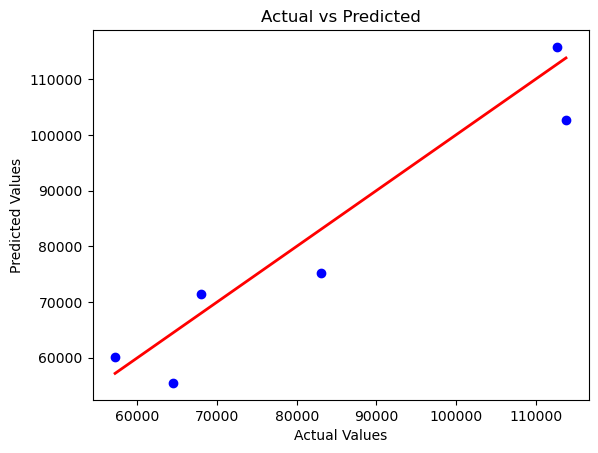

In [74]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [78]:
#NOTESSSSS:
#onenote:///C:\Users\spand\Documents\OneNote%20Notebooks\Linear%20regression\New%20Section%201.one#Linear%20Regression&section-id={7C53ECE2-60C9-490B-B55E-8C11ABDF05FD}&page-id={7FB1EE03-1D62-4C86-BE0F-122E655C40C9}&end